In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**Exercise 4.1.** (Purpose: To gain experience with the apply function in R, while dealing with a concrete example of computing conditional probabilities.) The eye-color hair-color data from Table 4.1 are built into R as the array named HairEyeColor. The array is frequencies of eye and hair color for males and females. Run the following code in R:

In [24]:
# Generate the table
hairEyeColorArray = [[0.11, 0.2, 0.043, 0.013], [0.03, 0.14, 0.03, 0.16],
                     [0.03, 0.09, 0.02, 0.02], [0.01, 0.05, 0.02, 0.03]]
hairList = ['Black', 'Brunette', 'Red', 'Blond']
eyeList = ['Brown', 'Blue', 'Hazel', 'Green']
hairEyeColorDf = pd.DataFrame(hairEyeColorArray).round(2)
hairEyeColorDf.columns = hairList
hairEyeColorDf.index = eyeList
hairProp = hairEyeColorDf.sum()
eyeProp = hairEyeColorDf.sum(axis=1)

In [28]:
# Conditional probablities
condBlue = hairEyeColorDf.loc['Blue']/hairEyeColorDf.loc['Blue'].sum()
condBlue.round(2)

Black       0.08
Brunette    0.39
Red         0.08
Blond       0.44
Name: Blue, dtype: float64

**Exercise 4.2.** (Purpose: To give you some experience with random number generation in R.) Modify the coin flipping program in Section 4.5 RunningProportion.R to simulate a biased coin that has p(H) = 0.8. Change the height of the reference line in the plot to match p(H). Comment your code. Hint: Read the help for the sample command.

**Exercise 4.3.** (Purpose: To have you work through an example of the logic presented in Section 4.2.1.2.) Determine the exact probability of drawing a 10 from a shuffled pinochle deck. (In a pinochle deck, there are 48 cards. There are six values: 9, 10, Jack, Queen, King, Ace. There are two copies of each value in each of the standard four suits: hearts, diamonds, clubs, spades.)
   
    (A) What is the probability of getting a 10?
    
    (B) What is the probability of getting a 10 or Jack?


**Exercise 4.4.** (Purpose: To give you hands-on experience with a simple probability density function, in R and in calculus, and to reemphasize that density functions can have values larger than 1.) Consider a spinner with a [0,1] scale on its circumference. Suppose that the spinner is slanted or magnetized or bent in some way such that it is biased, and its probability density function is p(x) = 6x(1 − x) over the interval x ∈ [0, 1].

    (A) Adapt the program IntegralOfDensity.R to plot this density function and approximate its integral. Comment your code. Be careful to consider values of x only in the interval [0, 1]. Hint: You can omit the first couple of lines regarding meanval and sdval, because those parameter values pertain only to the normal distribution. Then set xlow=0 and xhigh=1, and set dx to some small value.

    (B) Derive the exact integral using calculus. Hint: See the example, Equation 4.7. 
    
    (C) Does this function satisfy Equation 4.3?

    (D) From inspecting the graph, what is the maximal value of p(x)?


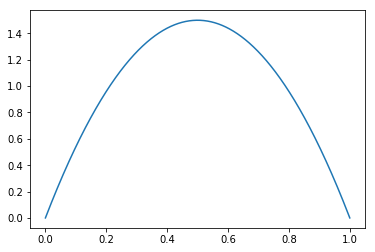

In [42]:
#(A)
def plot_func(f, xlim):
    x = np.linspace(xlim[0], xlim[1], 1000)
    fig, ax = plt.subplots()
    ax.plot(x,f)

f = 6*x*(1-x)
plot_func(f, (0,1))

**Exercise 4.6.** [Purpose: Recognize and work with the fact that Equation 4.9 can be solved for the joint probability, which will be crucial for developing Bayes’ theorem.] School children were surveyed regarding their favorite foods. Of the total sample, 20% were 1st graders, 20% were 6th graders, and 60% were 11th graders. For each grade, the following table shows the proportion of respondents that chose each of three foods as their favorite:

From that information, construct a table of joint probabilities of grade and favorite food. Also, say whether grade and favorite food are independent or not, and how you ascertained the answer. Hint: You are given p(grade) and p(food|grade). You need to determine p(grade,food).

In [46]:
survey_array = [[0.3, 0.6, 0.1], [0.6, 0.3, 0.1],[0.3, 0.1, 0.6]]
df = pd.DataFrame(survey_array)
df.index = ['1st graders', '6th graders', '11th graders']
df.columns = ['Ice cream', 'Fruit', 'French fries']


,Ice cream,Fruit,French fries
1st graders,0.3,0.6,0.1
6th graders,0.6,0.3,0.1
11th graders,0.3,0.1,0.6


In [48]:
# Joint distribution
df.loc['1st graders'] = df.loc['1st graders']*0.2
df.loc['6th graders'] = df.loc['6th graders']*0.2
df.loc['11th graders'] = df.loc['11th graders']*0.6
df


,Ice cream,Fruit,French fries
1st graders,0.06,0.12,0.02
6th graders,0.12,0.06,0.02
11th graders,0.18,0.06,0.36


In [56]:
p_ice_cream, p_fruit, p_french_fries = df.sum()
p_1st, p_6th, p_11th = df.sum(axis=1)

In [58]:
p_fruit_bar_1st = df.loc['1st graders', 'Fruit']

print(p_fruit_bar_1st)
print(p_fruit, p_1st)
print(p_fruit_bar_1st == p_fruit * p_1st)

0.12
0.24 0.2
False
